In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 16,10
rcParams["lines.linewidth"] = 5
rcParams["xtick.labelsize"] = "x-large"
rcParams["ytick.labelsize"] = "x-large"

In [82]:
data = pd.read_csv('https://raw.githubusercontent.com/kevinnkevinn/portfoliodatascience/main/Data%20Source/botak_kotor.csv', sep=',')
data.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB


In [84]:
for col in data.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column:       umur	 percent of NaN value: 1.07%
column: jenis_kelamin	 percent of NaN value: 0.97%
column:  pekerjaan	 percent of NaN value: 1.98%
column:   provinsi	 percent of NaN value: 1.09%
column:       gaji	 percent of NaN value: 0.93%
column: is_menikah	 percent of NaN value: 0.91%
column: is_keturunan	 percent of NaN value: 1.12%
column:      berat	 percent of NaN value: 0.71%
column:     tinggi	 percent of NaN value: 0.93%
column:      sampo	 percent of NaN value: 0.75%
column: is_merokok	 percent of NaN value: 0.88%
column: pendidikan	 percent of NaN value: 0.88%
column:     stress	 percent of NaN value: 0.81%
column: botak_prob	 percent of NaN value: 1.00%


In [85]:
data.isnull().sum()

umur              85
jenis_kelamin     77
pekerjaan        157
provinsi          86
gaji              74
is_menikah        72
is_keturunan      89
berat             56
tinggi            74
sampo             59
is_merokok        70
pendidikan        70
stress            64
botak_prob        79
dtype: int64

In [86]:
data.columns

Index(['umur', 'jenis_kelamin', 'pekerjaan', 'provinsi', 'gaji', 'is_menikah',
       'is_keturunan', 'berat', 'tinggi', 'sampo', 'is_merokok', 'pendidikan',
       'stress', 'botak_prob'],
      dtype='object')

In [87]:
data.dropna(subset=['umur', 'jenis_kelamin', 'pekerjaan', 'provinsi', 'gaji', 'is_menikah',
       'is_keturunan', 'berat', 'tinggi', 'sampo', 'is_merokok', 'pendidikan',
       'stress', 'botak_prob'], inplace=True)
data.isna().sum()

umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
stress           0
botak_prob       0
dtype: int64

In [88]:
#cek apakah ada data duplikat?
print(data.duplicated().sum()) #ternyata ada duplicated data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum()) #data sudah tidak ada data duplikated

70
0


In [89]:
num = ['umur','gaji','is_menikah','is_keturunan','berat','tinggi','is_merokok','stress','botak_prob']
cat = ['jenis_kelamin','pekerjaan','provinsi','sampo','pendidikan']

In [90]:
data[num].describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob
count,6811.000000,6.811000e+03,6811.000000,6811.000000,6811.000000,6811.000000,6811.000000,6811.000000,6811.000000
mean,39.497871,8.833817e+06,0.979298,0.204375,55.897866,167.235868,0.496403,5.443254,0.574237
std,9.924182,4.480732e+06,0.142395,0.403274,9.545669,10.937908,0.500024,2.865841,0.173635
min,2.000000,1.500000e+06,0.000000,0.000000,40.319619,127.993496,0.000000,1.000000,0.064633
25%,33.000000,5.723765e+06,1.000000,0.000000,49.280519,159.715542,0.000000,3.000000,0.453541
50%,39.000000,7.816896e+06,1.000000,0.000000,53.811044,167.151563,0.000000,5.000000,0.568028
75%,46.000000,1.082492e+07,1.000000,0.000000,60.217055,174.443347,1.000000,8.000000,0.686758
max,77.000000,5.000000e+07,1.000000,1.000000,126.042823,211.285582,1.000000,10.000000,1.000000


In [91]:
data[cat].describe()

,jenis_kelamin,pekerjaan,provinsi,sampo,pendidikan
count,6811,6811,6811,6811,6811
unique,2,4,34,5,6
top,Laki-laki,Pegawai swasta,Kupang,Deadbuoy,S1
freq,4660,2779,233,1396,3761


In [92]:
for col in cat: #berikut adalah searan nilainya
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom jenis_kelamin:
Laki-laki    4660
Perempuan    2151
Name: jenis_kelamin, dtype: int64

Value count kolom pekerjaan:
Pegawai swasta    2779
PNS               2742
Freelance         1004
Pengangguran       286
Name: pekerjaan, dtype: int64

Value count kolom provinsi:
Kupang            233
Denpasar          221
Makassar          217
Semarang          214
Banjarmasin       212
Tanjungselor      212
Pontianak         211
Bengkulu          208
Gorontalo         206
Ambon             204
Mataram           204
Serang            204
Mamuju            204
Pekanbaru         203
Kendari           201
Manado            201
Jambi             201
Pangkalpinang     200
Tanjung Pinang    200
Banda Lampung     199
Samarinda         199
Jayapura          198
Jakarta           197
Yogyakarta        193
Manokwari         193
Banda Aceh        192
Sofifi            192
Medan             189
Palu              189
Palembang         189
Palangkaraya      188
Padang            186
Bandung     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

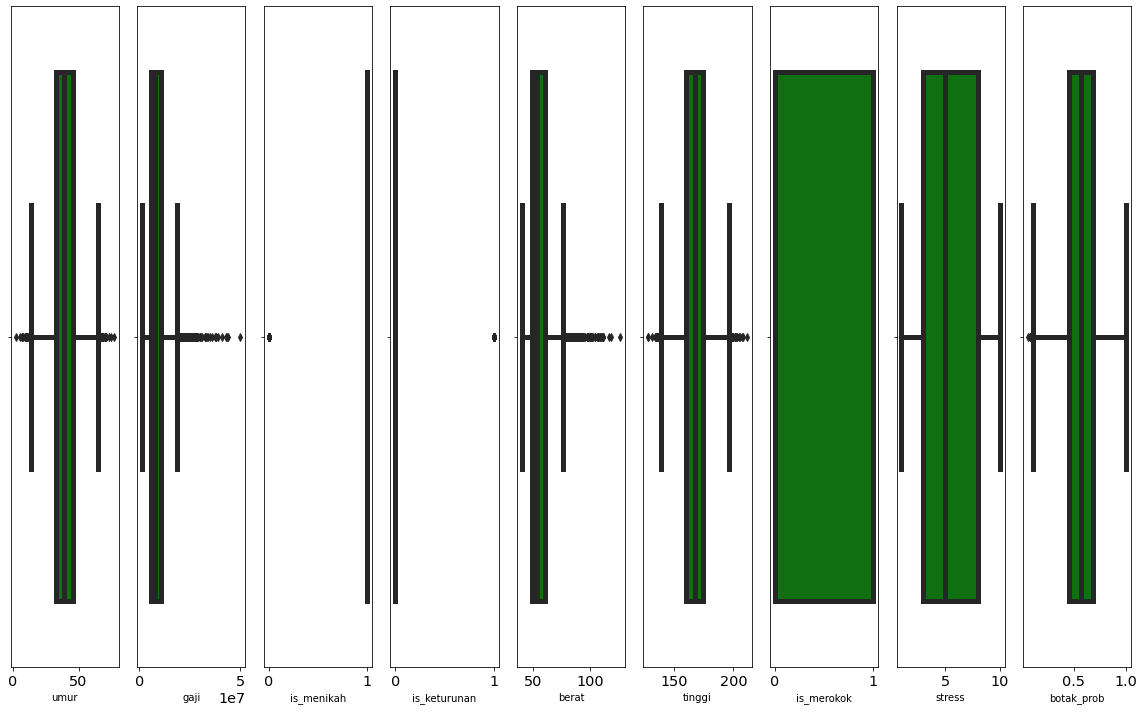

In [93]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(data[num[i]], color='green', orient='v')
    plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

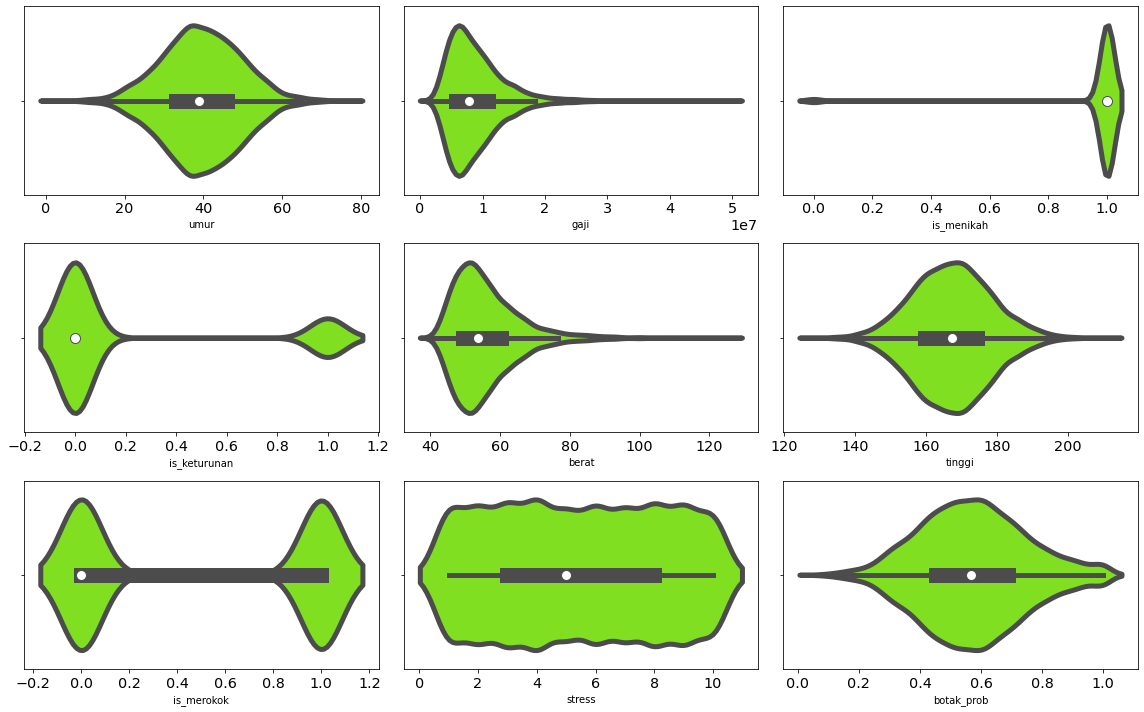

In [94]:
for i in range(0, len(num)):
    plt.subplot(3,3, i+1)
    sns.violinplot(data[num[i]], color='chartreuse', orient='v')
    plt.tight_layout()

In [95]:
print("Skew: {}".format(data[num].skew())) 
#setelah dilihat nilai skew kecil lebih baik tidak perlu dilakukan normalisasi

Skew: umur            0.010910
gaji            1.818757
is_menikah     -6.733950
is_keturunan    1.466554
berat           1.637091
tinggi          0.092586
is_merokok      0.014392
stress          0.021288
botak_prob      0.193498
dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

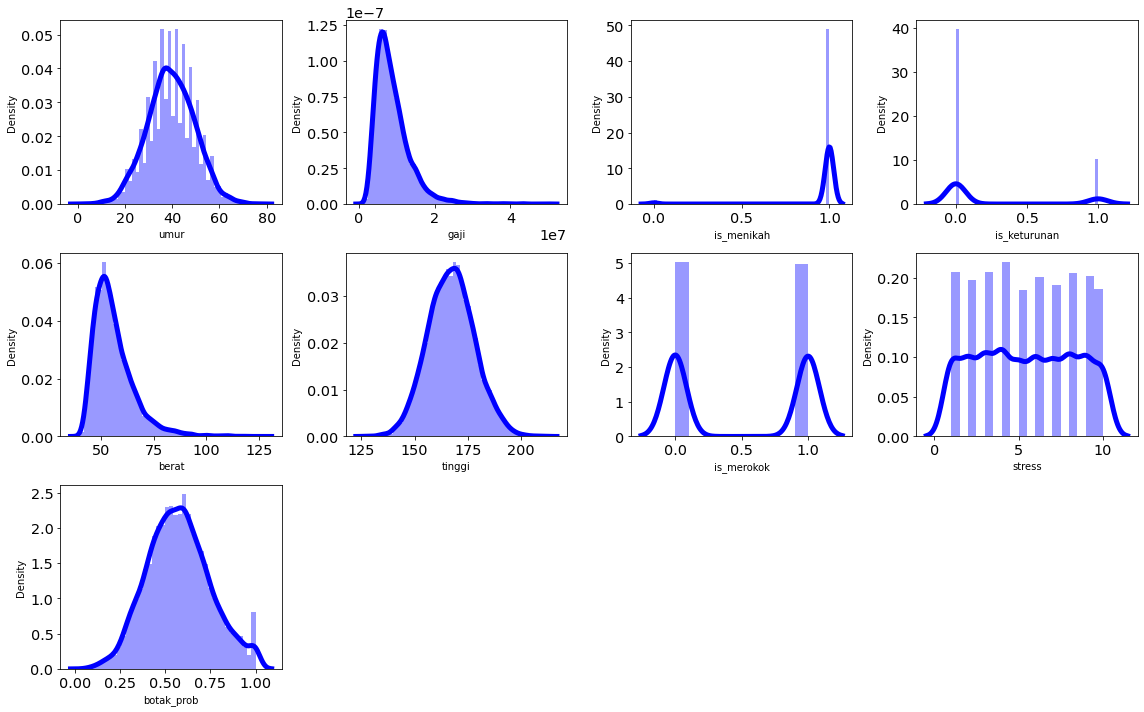

In [96]:
# Menampilkan distribution plot (num)
for i in range(0, len(num)):
  plt.subplot(3, len(num)/2, i+1)
  sns.distplot(data[num[i]], color="blue")
  plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

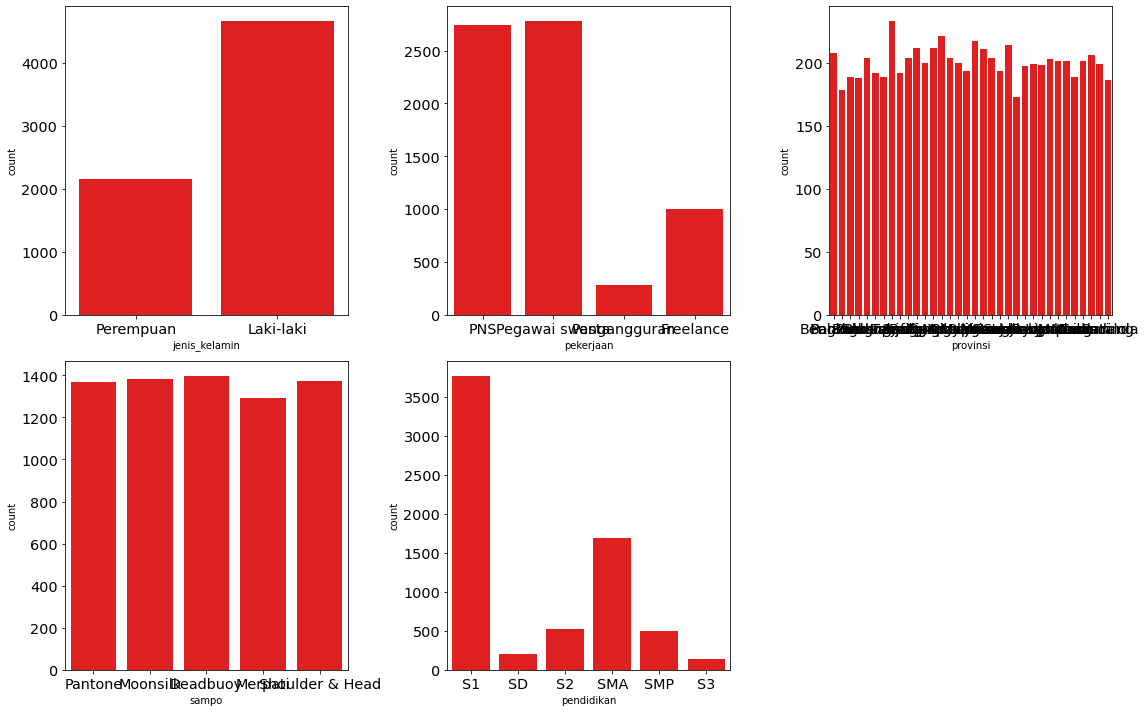

In [97]:
for i in range(0, len(cat)):
  plt.subplot(2, 3, i+1)
  sns.countplot(data[cat[i]], color="red", orient="h")
  plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


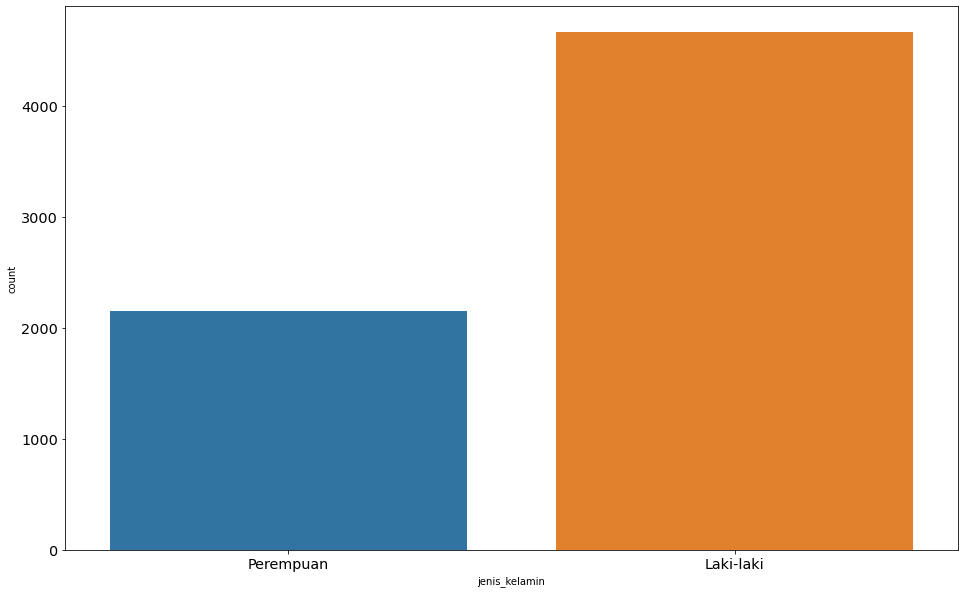

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


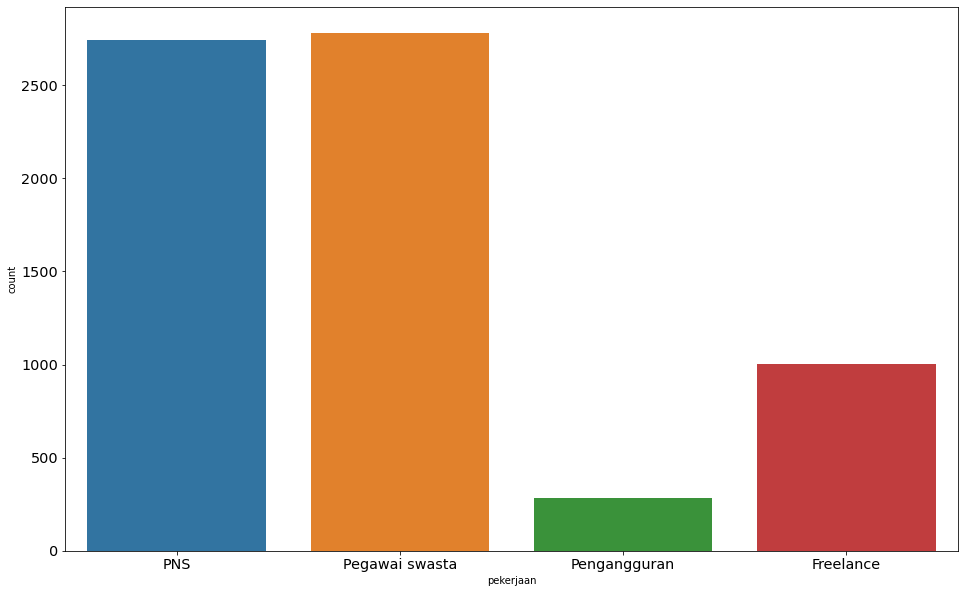

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


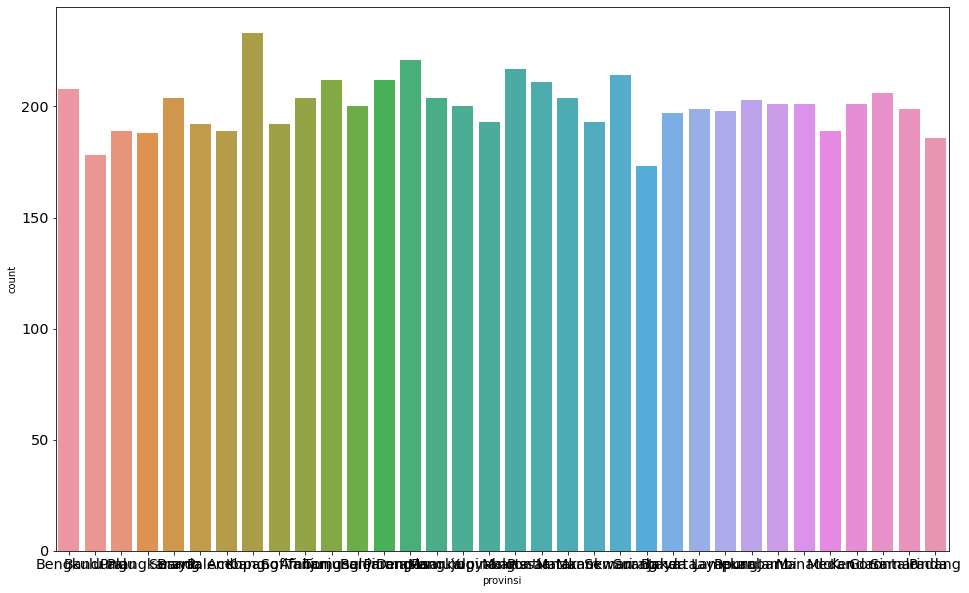

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


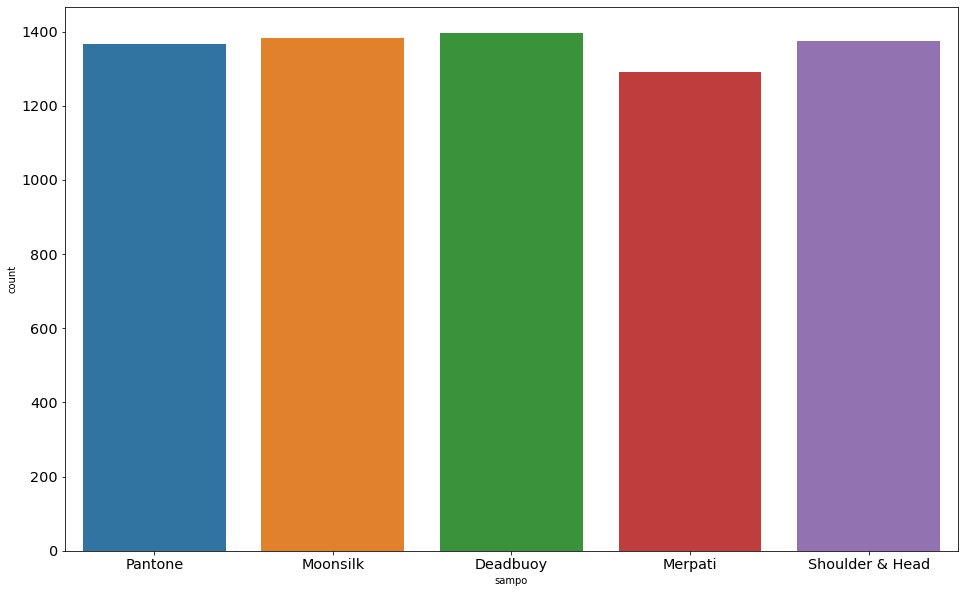

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


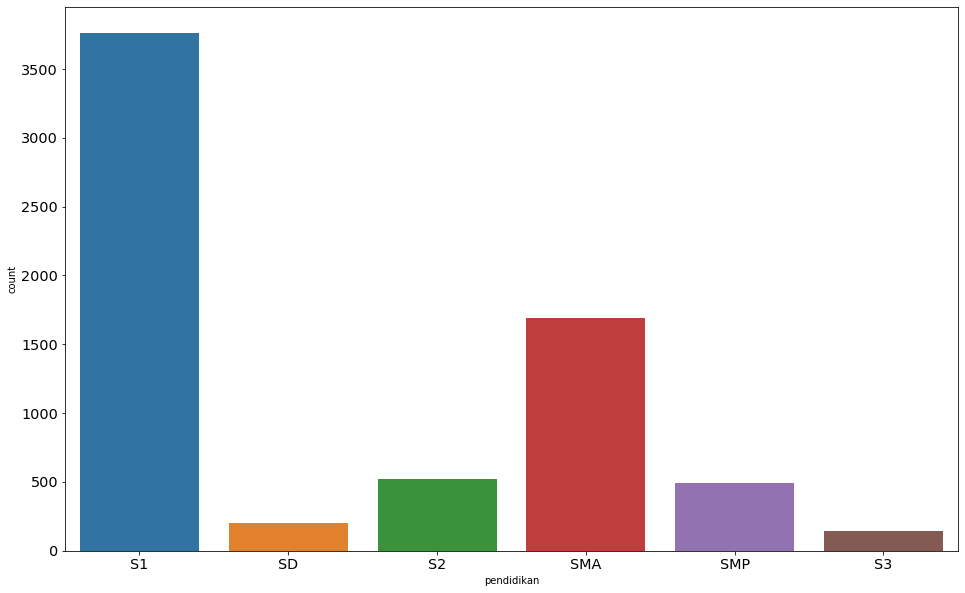

In [98]:
for i in data[cat].columns: #visualisasi univariate
    sns.countplot(data[i])
    plt.show()

In [99]:
# Menggunakan Zscore
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')
filtered_entries = np.array([False] * len(data))
for col in num:
    zscore = abs(stats.zscore(data[col]))
    print(np.max(zscore))
    filtered_entries = (zscore > 3) | filtered_entries
    
data1 = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')

Jumlah baris sebelum memfilter outlier: 6811
3.7791409615658957
9.188054225271033
6.877860462309997
1.9730584811695124
7.348893894094315
4.027548041602113
1.0072203103706696
1.5901376459840553
2.935134453065452
Jumlah baris setelah memfilter outlier: 6435


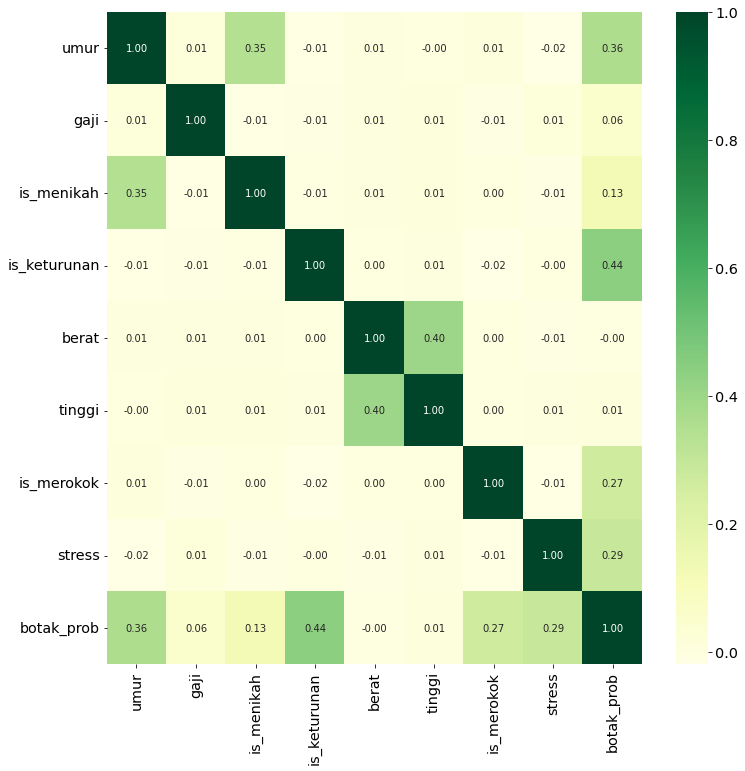

In [100]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), cmap='YlGn', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

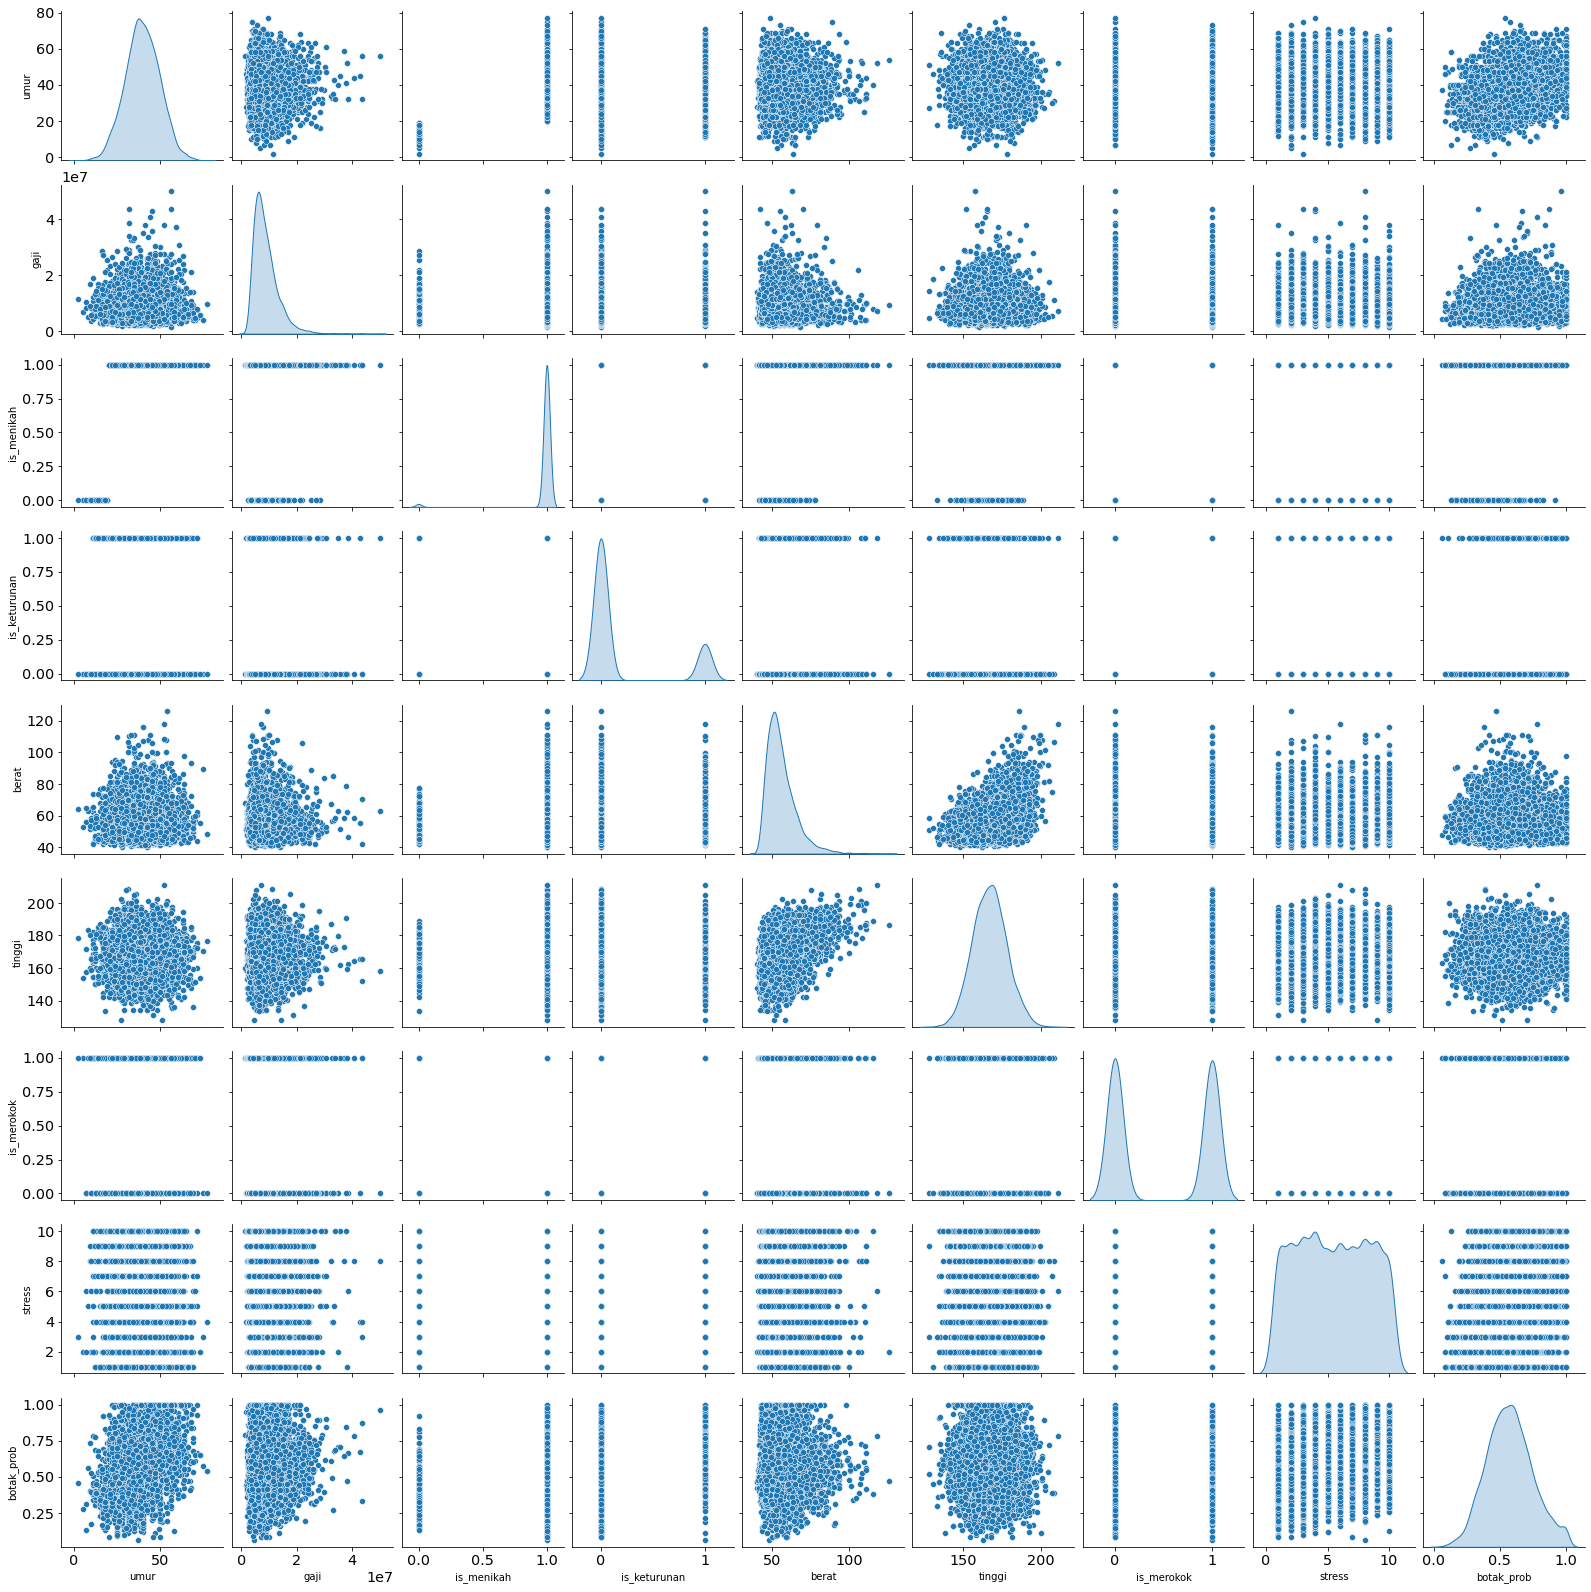

In [101]:
plt.figure(figsize=(15, 15)) #sebaran nilai : sama seperti representasi korelasi hanya ini bentuk visualisasinya
sns.pairplot(data, diag_kind='kde')

In [102]:
for cat in [["pekerjaan", "jenis_kelamin","sampo","pendidikan"]]:
  onehots = pd.get_dummies(data[cat], prefix=cat)
  data1 = data.join(onehots)

In [103]:
data1.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,...,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head,pendidikan_S1,pendidikan_S2,pendidikan_S3,pendidikan_SD,pendidikan_SMA,pendidikan_SMP
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,...,0,0,1,0,1,0,0,0,0,0
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,...,0,0,1,0,1,0,0,0,0,0
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,...,0,1,0,0,1,0,0,0,0,0
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,...,0,0,0,0,0,0,0,1,0,0
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,...,1,0,0,0,0,1,0,0,0,0


In [104]:
data1.drop(["pekerjaan", "jenis_kelamin","sampo","pendidikan"], axis = 1, inplace = True)

In [105]:
data1.to_excel("botak_bersih.xlsx", index=False)